In [2]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import pandas as pd

In [2]:
point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

In [3]:
print(polygon.contains(point))

True


# Geopandas Join
https://medium.com/@bobhaffner/spatial-joins-in-geopandas-c5e916a763f3

In [4]:
url = "http://www2.census.gov/geo/docs/maps-data/data/gazetteer/2016_Gazetteer/2016_Gaz_zcta_national.zip"
zips = pd.read_csv(url, dtype={"GEOID" : "str"}, sep="\t", usecols=[0, 5, 6])
zips.columns = zips.columns.str.strip() #some column cleanup
print(len(zips))
print(zips.head())

33144
   GEOID   INTPTLAT  INTPTLONG
0  00601  18.180555 -66.749961
1  00602  18.361945 -67.175597
2  00603  18.455183 -67.119887
3  00606  18.158345 -66.932911
4  00610  18.295366 -67.125135


In [5]:
geom = zips.apply(lambda x : Point([x["INTPTLONG"],x["INTPTLAT"]]), axis=1)
zips = gpd.GeoDataFrame(zips, geometry=geom) #geom is a Series
zips.crs = {"init": "epsg:4326"}
print(zips.head())

   GEOID   INTPTLAT  INTPTLONG                    geometry
0  00601  18.180555 -66.749961  POINT (-66.74996 18.18055)
1  00602  18.361945 -67.175597  POINT (-67.17560 18.36195)
2  00603  18.455183 -67.119887  POINT (-67.11989 18.45518)
3  00606  18.158345 -66.932911  POINT (-66.93291 18.15835)
4  00610  18.295366 -67.125135  POINT (-67.12514 18.29537)


In [6]:
geojson_file = r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\gz_2010_us_040_00_500k.json"
states = gpd.read_file(geojson_file)[["NAME", "geometry"]]
print(len(states))
print(states.head())

52
            NAME                                           geometry
0          Maine  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...
1  Massachusetts  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...
2       Michigan  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...
3        Montana  POLYGON ((-104.05770 44.99743, -104.25015 44.9...
4         Nevada  POLYGON ((-114.05060 37.00040, -114.04999 36.9...


In [7]:
zips_and_states = gpd.sjoin(zips, states, op="within")
print(zips_and_states[["GEOID", "NAME", "index_right"]].head())

   GEOID         NAME  index_right
0  00601  Puerto Rico           16
1  00602  Puerto Rico           16
2  00603  Puerto Rico           16
3  00606  Puerto Rico           16
4  00610  Puerto Rico           16


In [8]:
print(zips_and_states[["GEOID", "NAME", "index_right"]].tail())

       GEOID    NAME  index_right
33139  99923  Alaska           19
33140  99925  Alaska           19
33141  99926  Alaska           19
33142  99927  Alaska           19
33143  99929  Alaska           19


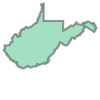

In [9]:
states.iloc[50]['geometry']

In [10]:
type(states)

geopandas.geodataframe.GeoDataFrame

In [16]:
type(states['geometry'])

geopandas.geoseries.GeoSeries

# Montreal speed limit data
https://open.canada.ca/data/en/dataset/696bd5a6-e47f-49bb-a687-7af296de1555


https://developer.tomtom.com/traffic-api

In [17]:
road_network = gpd.read_file(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\road_network\grnf024r09a_e.shp")

In [3]:
mtl_roads = gpd.read_file(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\geojson_dump.json")

In [7]:
print(mtl_roads.iloc[0]['geometry'])

LINESTRING (-73.74081689158372 45.51897292308536, -73.7419541040326 45.51970333218907)
